In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine

wine_load = load_wine()

In [2]:
wine = pd.DataFrame(wine_load.data,columns = wine_load.feature_names)

In [3]:
wine_load.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [4]:
wine.iloc[0]

alcohol                           14.23
malic_acid                         1.71
ash                                2.43
alcalinity_of_ash                 15.60
magnesium                        127.00
total_phenols                      2.80
flavanoids                         3.06
nonflavanoid_phenols               0.28
proanthocyanins                    2.29
color_intensity                    5.64
hue                                1.04
od280/od315_of_diluted_wines       3.92
proline                         1065.00
Name: 0, dtype: float64

In [5]:
wine2 = wine.assign(Class = lambda x: 1)

In [6]:
wine2

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,Class
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,1
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,1
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,1
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,1
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,1
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,1
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,1
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,1


In [7]:
wine['Class'] = wine_load.target

In [8]:
wine['Class'] = wine['Class'].map({0: 'class_0', 1: 'class_1', 2: 'class_2'})

In [9]:
wine['Class']

0      class_0
1      class_0
2      class_0
3      class_0
4      class_0
        ...   
173    class_2
174    class_2
175    class_2
176    class_2
177    class_2
Name: Class, Length: 178, dtype: object

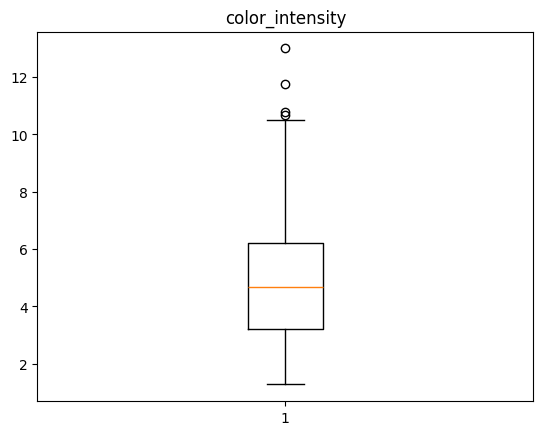

In [10]:
import matplotlib.pyplot as plt

plt.boxplot(wine['color_intensity'], whis=1.5)
plt.title('color_intensity')
plt.show()


In [11]:
import numpy as np

def outliers_iqr(dt, col):
    quartile_1, quartile_3 = np.percentile(dt[col], [25, 75])
    iqr = quartile_3 - quartile_1
    lower_whis = quartile_1 - (iqr * 1.5)
    upper_whis = quartile_3 + (iqr * 1.5)
    outliers = dt[(dt[col] > upper_whis) | (dt[col] < lower_whis)]
    return outliers[[col]]


In [12]:
# 비트연산
# 숫자만큼 비트를 옮기는 연산
print(1 << 1)
print(1 << 2)
print(1 << 3)
print(1 << 4)


2
4
8
16


In [13]:
outliers_iqr(wine, 'color_intensity')

,color_intensity
151,10.80
158,13.00
159,11.75
166,10.68


In [33]:
wine_outliers = wine.drop(index=outliers_iqr(wine,'color_intensity').index)

In [39]:
wine.shape

(178, 14)

In [41]:
wine_outliers.shape

(174, 14)

In [34]:
wine['color_intensity'].mean()

5.058089882022472

In [35]:
wine.loc[outliers_iqr(wine, 'color_intensity').index, 'color_intensity'] = np.NaN

In [37]:
# null 값은 제거후 계산한다
wine['color_intensity'].mean()

4.908678155172414

In [43]:
wine['color_intensity'] = wine['color_intensity'].fillna(wine['color_intensity'].mean())

# 범주형

In [15]:
import pandas as pd
from sklearn.datasets import load_iris

iris = load_iris()

In [17]:
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [26]:
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)

In [27]:
iris_df['Class'] = list(map(lambda x : {0: 'Setosa', 1: 'Versicolour', 2:'virginica'}[x], iris.target))

In [28]:
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Class
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [29]:
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   Class              150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [30]:
pd.Categorical(iris_df['Class'])

['Setosa', 'Setosa', 'Setosa', 'Setosa', 'Setosa', ..., 'virginica', 'virginica', 'virginica', 'virginica', 'virginica']
Length: 150
Categories (3, object): ['Setosa', 'Versicolour', 'virginica']

In [44]:
# 카테고리칼 컬럼 타입은 머신러닝이 이해하지 못한다.


In [46]:
# get_dummies 함수를 사용하면 one-hot encoding 해준다.
pd.get_dummies(iris_df, columns=['Class'])

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Class_Setosa,Class_Versicolour,Class_virginica
0,5.1,3.5,1.4,0.2,True,False,False
1,4.9,3.0,1.4,0.2,True,False,False
2,4.7,3.2,1.3,0.2,True,False,False
3,4.6,3.1,1.5,0.2,True,False,False
4,5.0,3.6,1.4,0.2,True,False,False
...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,False,False,True
146,6.3,2.5,5.0,1.9,False,False,True
147,6.5,3.0,5.2,2.0,False,False,True
148,6.2,3.4,5.4,2.3,False,False,True


# 데이터 분할

In [48]:
from sklearn.model_selection import train_test_split

# 8:2 -> Train : Test
# 7:2:1 -> Train : Test : validation
# cross-validation 
    # ex) k-fole

In [56]:
# stratify = 분류 비율을 동일하게 조절
X_train, X_test, y_train, y_test = train_test_split(iris_df.drop(columns='Class'), iris_df['Class'], test_size = 0.2, \
                                                   stratify = iris_df['Class'])

In [57]:
y_train.value_counts(normalize=True)

Class
Setosa         0.333333
Versicolour    0.333333
virginica      0.333333
Name: proportion, dtype: float64

In [58]:
y_test.value_counts(normalize=True)

Class
Versicolour    0.333333
virginica      0.333333
Setosa         0.333333
Name: proportion, dtype: float64

# 데이터 스케일링

In [61]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# 객체 생성
StdScaler = StandardScaler()

# Train 데이터의 fitting과 스케일링
StdScaler.fit(X_train)
X_train_sc = StdScaler.transform(X_train)
# -> StdScaler.fit_transform(X_train)

# Test 데이터의 스케일링
X_test_sc = StdScaler.transform(X_test)


In [62]:
print("\t\t(min, max) (mean, std)")
print("Train_scaled (%.2f, %.2f) (%.2f, %.2f)"%(X_train_sc.min(), X_train_sc.max(),  X_train_sc.mean(),  X_train_sc.std()))
print("Test_scaled (%.2f, %.2f) (%.2f, %.2f)"%(X_test_sc.min(), X_test_sc.max(),  X_test_sc.mean(),  X_test_sc.std()))


		(min, max) (mean, std)
Train_scaled (-2.60, 3.24) (-0.00, 1.00)
Test_scaled (-2.12, 2.75) (-0.13, 1.01)


In [63]:
MmScaler = MinMaxScaler()

# Train 데이터의 fitting과 스케일링
MmScaler.fit(X_train)
X_train_sc = MmScaler.transform(X_train)

# Test 데이터의 스케일링
X_test_sc = MmScaler.transform(X_test)


print("\t\t(min, max) (mean, std)")
print("Train_scaled (%.2f, %.2f) (%.2f, %.2f)"%(X_train_sc.min(), X_train_sc.max(),  X_train_sc.mean(),  X_train_sc.std()))
print("Test_scaled (%.2f, %.2f) (%.2f, %.2f)"%(X_test_sc.min(), X_test_sc.max(),  X_test_sc.mean(),  X_test_sc.std()))


		(min, max) (mean, std)
Train_scaled (0.00, 1.00) (0.45, 0.26)
Test_scaled (-0.02, 1.00) (0.42, 0.26)


In [64]:
from sklearn.preprocessing import MaxAbsScaler

MaScaler = MaxAbsScaler()

# Train 데이터의 fitting과 스케일링
MaScaler.fit(X_train)
X_train_sc = MaScaler.transform(X_train)

# Test 데이터의 스케일링
X_test_sc = MaScaler.transform(X_test)


print("\t\t(min, max) (mean, std)")
print("Train_scaled (%.2f, %.2f) (%.2f, %.2f)"%(X_train_sc.min(), X_train_sc.max(),  X_train_sc.mean(),  X_train_sc.std()))
print("Test_scaled (%.2f, %.2f) (%.2f, %.2f)"%(X_test_sc.min(), X_test_sc.max(),  X_test_sc.mean(),  X_test_sc.std()))

		(min, max) (mean, std)
Train_scaled (0.04, 1.00) (0.62, 0.24)
Test_scaled (0.08, 1.00) (0.60, 0.23)


In [66]:

from sklearn.preprocessing import RobustScaler

RuScaler = RobustScaler()

# Train 데이터의 fitting과 스케일링
RuScaler.fit(X_train)
X_train_sc = RuScaler.transform(X_train)

# Test 데이터의 스케일링
X_test_sc = RuScaler.transform(X_test)

print("\t\t(min, max) (mean, std)")
print("Train_scaled (%.2f, %.2f) (%.2f, %.2f)"%(X_train_sc.min(), X_train_sc.max(),  X_train_sc.mean(),  X_train_sc.std()))
print("Test_scaled (%.2f, %.2f) (%.2f, %.2f)"%(X_test_sc.min(), X_test_sc.max(),  X_test_sc.mean(),  X_test_sc.std()))

		(min, max) (mean, std)
Train_scaled (-2.00, 2.80) (-0.03, 0.64)
Test_scaled (-1.60, 2.40) (-0.11, 0.67)


In [67]:
# 원복 시키는 방법
display(pd.DataFrame(X_train_sc).head(3))
X_Original = RuScaler.inverse_transform(X_train_sc)
display(pd.DataFrame(X_Original).head(3))


,0,1,2,3
0,-0.535714,1.6,-0.794326,-0.766667
1,-0.750000,0.0,-0.851064,-0.700000
2,-0.250000,-0.8,0.000000,-0.100000


,0,1,2,3
0,5.1,3.8,1.6,0.2
1,4.8,3.0,1.4,0.3
2,5.5,2.6,4.4,1.2


# 차원의 저주

In [68]:
# 수치형 데이터만 추출
features = ['수치형변수1', '수치형변수2']
x = iris_df.drop(columns = 'Class')

# 수치형 변수 정규화
from sklearn.preprocessing import StandardScaler
x = StandardScaler().fit_transform(x)

pd.DataFrame(x).head()


,0,1,2,3
0,-0.900681,1.019004,-1.340227,-1.315444
1,-1.143017,-0.131979,-1.340227,-1.315444
2,-1.385353,0.328414,-1.397064,-1.315444
3,-1.506521,0.098217,-1.283389,-1.315444
4,-1.021849,1.249201,-1.340227,-1.315444


In [69]:
from sklearn.decomposition import PCA
pca = PCA( n_components = 4) 
pca_fit = pca.fit(x)

print("고유 값 : ", pca.singular_values_)
print("분산 설명력: ", pca.explained_variance_ratio_)

고유 값 :  [20.92306556 11.7091661   4.69185798  1.76273239]
분산 설명력:  [0.72962445 0.22850762 0.03668922 0.00517871]


In [70]:
pca_fit

PCA(n_components=4)

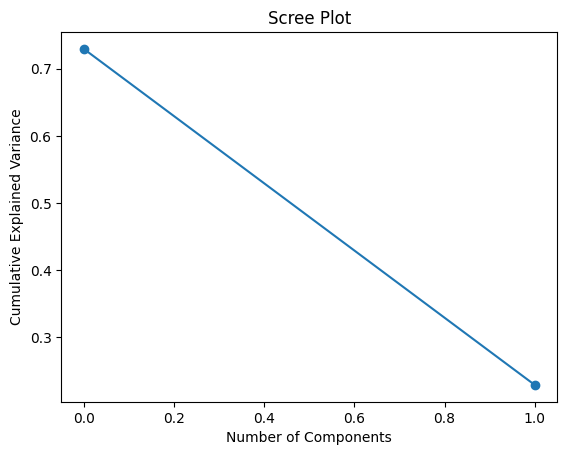

In [74]:
# pca는 차원축속 변수축소 방법

import matplotlib.pyplot as plt

plt.title('Scree Plot')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.plot(pca.explained_variance_ratio_ , 'o-')
plt.show()

In [73]:
pca = PCA(n_components=2)
printcipalComponents = pca.fit_transform(x)
principal_iris = pd.DataFrame(data=printcipalComponents, columns=['pc1', 'pc2'])
principal_iris.head()

,pc1,pc2
0,-2.264703,0.480027
1,-2.080961,-0.674134
2,-2.364229,-0.341908
3,-2.299384,-0.597395
4,-2.389842,0.646835


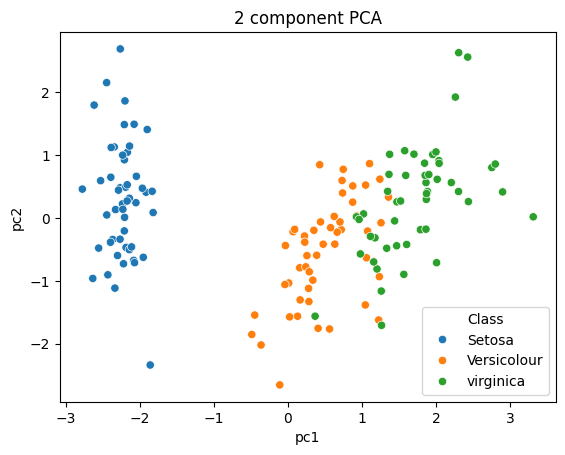

In [75]:

import matplotlib.pyplot as plt
import seaborn as sns

plt.title('2 component PCA' )
sns.scatterplot(x = 'pc1', y = 'pc2', hue = iris_df.Class,  data = principal_iris)
plt.show()


# 모델 확인

In [92]:
import pickle

with open("./restapi/knn_class_model.pkl.pk", 'rb') as f:
    model1 = pickle.load(f)

model1['model'].predict([[10, 20]])
train_scaled.reshape(1,2)
train_scaled = (np.array([11.8, 9.9] - model1['mean']) / model1['std'])
if model1['model'].predict(train_scaled.reshape(1,2)).tolist()[0] == 0.0:
    print('{result: 도미}')
else :
    print('{result: 빙어}')

In [93]:
model1

{'mean': array([ 27.29722222, 454.09722222]),
 'std': array([  9.98244253, 323.29893931]),
 'model': KNeighborsClassifier()}

In [94]:
model1['model'].predict([[10, 20]])
train_scaled.reshape(1,2)
train_scaled = (np.array([11.8, 9.9] - model1['mean']) / model1['std'])
if model1['model'].predict(train_scaled.reshape(1,2)).tolist()[0] == 0.0:
    print('{result: 도미}')
else :
    print('{result: 빙어}')

KNeighborsClassifier()

In [99]:
train_scaled.reshape(1,2)
train_scaled = (np.array([11.8, 9.9] - model1['mean']) / model1['std'])
if model1['model'].predict(train_scaled.reshape(1,2)).tolist()[0] == 0.0:
    print('{result: 도미}')
else :
    print('{result: 빙어}')

array([[-1.55244793, -1.37395199]])

In [100]:
train_scaled = (np.array([11.8, 9.9] - model1['mean']) / model1['std'])
if model1['model'].predict(train_scaled.reshape(1,2)).tolist()[0] == 0.0:
    print('{result: 도미}')
else :
    print('{result: 빙어}')

In [102]:
if model1['model'].predict(train_scaled.reshape(1,2)).tolist()[0] == 0.0:
    print('{result: 도미}')
else :
    print('{result: 빙어}')

{result: 도미}
